In [1]:
from pathlib import Path

In [2]:
filePath = Path.cwd().parent / 'Datasets' / 'NotrDataset.csv'
import pandas as pd

In [5]:
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1209 non-null   int64 
 1   Reviews     1209 non-null   object
 2   Mood        1209 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.5+ KB


In [7]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Reviews,Mood
0,"When I go to a Jurassic Park movie, I want som...",Notr
1,I loved Michael Chrichton's books and the Jura...,Notr
2,This movie consists mostly of us watching prev...,Notr
3,It's just amazing that no dinosaur hasn't bitt...,Notr
4,This movie was so utterly predictable it was a...,Notr


In [13]:
import re
df.Reviews = df['Reviews'].apply(lambda text: re.sub(r"[^a-zA-Z\s]", "", text))
df.head()


,Reviews,Mood
0,When I go to a Jurassic Park movie I want some...,Notr
1,I loved Michael Chrichtons books and the Juras...,Notr
2,This movie consists mostly of us watching prev...,Notr
3,Its just amazing that no dinosaur hasnt bitten...,Notr
4,This movie was so utterly predictable it was a...,Notr


<Axes: xlabel='Reviews', ylabel='Count'>

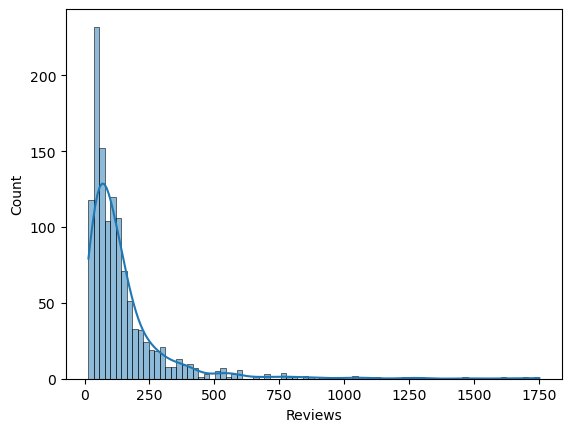

In [11]:
import seaborn as sns
sns.histplot(df['Reviews'].apply(lambda text: len(text.split())), kde = True)

<Axes: xlabel='Reviews', ylabel='Count'>

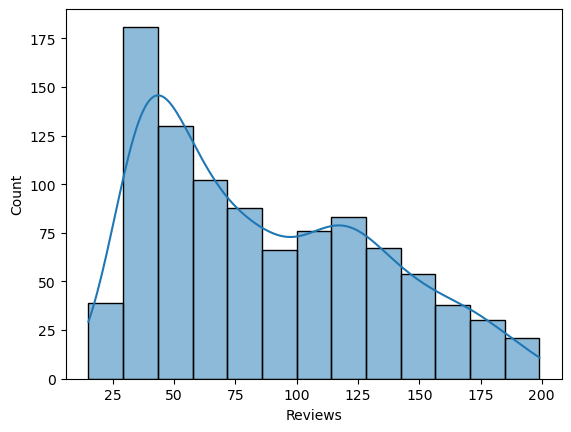

In [49]:
df_ = df[(df.Reviews.str.split().str.len() > 3) & (df.Reviews.str.split().str.len() < 200)]
sns.histplot(df_['Reviews'].apply(lambda text: len(text.split())), kde = True)

In [51]:
len(df_.index)

975

In [55]:
filePath2 = Path.cwd().parent / 'PreprocessedData' / 'NotrDataset.csv'
df_.to_csv(filePath2, index = False)